In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [56]:
dataset = pd.DataFrame(pd.read_csv("iris.csv").values[:, ])
print(dataset.shape)
print(type(dataset))
dataset.head()

(150, 5)
<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [57]:
print(dataset.describe())

            0      1      2      3       4
count   150.0  150.0  150.0  150.0     150
unique   35.0   23.0   43.0   22.0       3
top       5.0    3.0    1.4    0.2  Setosa
freq     10.0   26.0   13.0   29.0      50


In [58]:
n = len(dataset[dataset[4] == 'Versicolor'])
print("No of Versicolor in Dataset:",n)
n1 = len(dataset[dataset[4] == 'Virginica'])
print("No of Virginica in Dataset:",n1)
n2 = len(dataset[dataset[4] == 'Setosa'])
print("No of Setosa in Dataset:",n2)

No of Versicolor in Dataset: 50
No of Virginica in Dataset: 50
No of Setosa in Dataset: 50


In [59]:
dataset = dataset.to_numpy()
print(type(dataset))
#fix missing values
imputer = SimpleImputer(missing_values = 0, strategy ="mean")
imputer = imputer.fit(dataset[:, :-1])
dataset[:, :-1] = imputer.transform(dataset[:, :-1])
print(pd.DataFrame(dataset).describe())


<class 'numpy.ndarray'>
            0      1      2      3       4
count   150.0  150.0  150.0  150.0     150
unique   35.0   23.0   43.0   22.0       3
top       5.0    3.0    1.4    0.2  Setosa
freq     10.0   26.0   13.0   29.0      50


In [60]:
sc = StandardScaler()
dataset[:, :-1] = sc.fit_transform(dataset[:, :-1])
print(pd.DataFrame(dataset).describe())

                 0           1           2           3       4
count   150.000000  150.000000  150.000000  150.000000     150
unique   35.000000   23.000000   43.000000   22.000000       3
top      -1.021849   -0.131979   -1.340227   -1.315444  Setosa
freq     10.000000   26.000000   13.000000   29.000000      50


In [61]:
# split dataset into test set, train set and unlabel pool
def split(dataset, train_size, test_size):
	x = dataset[:, :-1]
	y = dataset[:, -1]
	x_train, x_pool, y_train, y_pool = train_test_split(
		x, y, train_size = train_size)
	unlabel, x_test, label, y_test = train_test_split(
		x_pool, y_pool, test_size = test_size)
	return x_train, y_train, x_test, y_test, unlabel, label

In [62]:
ac1, ac2 ,ac3= [], [], []# arrays to store accuracy of different 
uncrt_pt_ind = []

In [63]:
import random
def query_new(y_probab , time):
    if (time != 4):
        unc = []
        margin = []
        for i in y_probab:
            i.sort()  
            margin.append(i[2]-i[1])
        min_margin = margin.index(min(margin))
        return [min_margin]
    else:
        return [random.choice(range(len(y_probab)))]

In [64]:
def query(y_probab , time):
   unc = []
   margin = []
   for i in y_probab:
       i.sort()  
       margin.append(i[2]-i[1])
   min_margin = margin.index(min(margin))
   return [min_margin]

In [65]:

from sklearn.metrics import accuracy_score

# split dataset into train(5 %), test(25 %), unlabel(70 %)
x_train, y_train, x_test, y_test, unlabel, label = split(
	dataset, 0.05, 0.25)
# train model by active learning
for i in range(10):
	classifier1 = LogisticRegression()
	classifier1.fit(x_train, y_train)
	y_probab = classifier1.predict_proba(unlabel)
	p = 0.47 # range of uncertanity 0.47 to 0.53
	# uncrt_pt_ind = []
	print(unlabel.shape[0])
	# for i in range(unlabel.shape[0]):
	# 	if(y_probab[i] >= p and y_probab[i] <= 1-p):
	# 		# print(y_probab[i])
	# 		uncrt_pt_ind.append(i)
	# 		break
	uncrt_pt_ind = query(y_probab,i)
	print(uncrt_pt_ind)
	# uncrt_pt_ind = query(y_probab)
	x_train = np.append(unlabel[uncrt_pt_ind, :], x_train, axis = 0)
	y_train = np.append(label[uncrt_pt_ind], y_train)
	unlabel = np.delete(unlabel, uncrt_pt_ind, axis = 0)
	label = np.delete(label, uncrt_pt_ind)
	ac1.append(classifier1.score(x_test, y_test))

classifier2 = LogisticRegression()
classifier2.fit(x_train, y_train)
ac2.append(classifier2.score(x_test, y_test))


''' split dataset into train(same as generated by our model),
test(25 %), unlabel(rest) '''
train_size = x_train.shape[0]/dataset.shape[0]
x_train, y_train, x_test, y_test, unlabel, label = split(
	dataset, train_size, 0.25)
# train model without active learning
classifier3 = LogisticRegression()
results = classifier3.fit(x_train, y_train)
ac3.append(accuracy_score(y_test, results.predict(x_test)))

print(ac1)
print(ac2)
print(ac3)

107
[105]
106
[51]
105
[32]
104
[67]
103
[87]
102
[43]
101
[41]
100
[88]
99
[95]
98
[13]
[0.6666666666666666, 0.75, 0.9166666666666666, 0.9444444444444444, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9444444444444444, 0.9722222222222222]
[0.9444444444444444]
[0.7941176470588235]


In [66]:

from sklearn.metrics import accuracy_score

# split dataset into train(5 %), test(25 %), unlabel(70 %)
x_train, y_train, x_test, y_test, unlabel, label = split(
	dataset, 0.05, 0.25)
# train model by active learning
for i in range(10):
	classifier1 = LogisticRegression()
	classifier1.fit(x_train, y_train)
	y_probab = classifier1.predict_proba(unlabel)
	p = 0.47 # range of uncertanity 0.47 to 0.53
	# uncrt_pt_ind = []
	print(unlabel.shape[0])
	# for i in range(unlabel.shape[0]):
	# 	if(y_probab[i] >= p and y_probab[i] <= 1-p):
	# 		# print(y_probab[i])
	# 		uncrt_pt_ind.append(i)
	# 		break
	uncrt_pt_ind = query_new(y_probab , i)
	print(uncrt_pt_ind)
	# uncrt_pt_ind = query(y_probab)
	x_train = np.append(unlabel[uncrt_pt_ind, :], x_train, axis = 0)
	y_train = np.append(label[uncrt_pt_ind], y_train)
	unlabel = np.delete(unlabel, uncrt_pt_ind, axis = 0)
	label = np.delete(label, uncrt_pt_ind)
	ac1.append(classifier1.score(x_test, y_test))

classifier2 = LogisticRegression()
classifier2.fit(x_train, y_train)
ac2.append(classifier2.score(x_test, y_test))


print(ac1)
print(ac2)


107
[4]
106
[86]
105
[7]
104
[80]
103
[40]
102
[17]
101
[58]
100
[85]
99
[91]
98
[45]
[0.6666666666666666, 0.75, 0.9166666666666666, 0.9444444444444444, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9444444444444444, 0.9722222222222222, 0.6944444444444444, 0.6944444444444444, 0.8888888888888888, 0.75, 0.9166666666666666, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9722222222222222, 0.9444444444444444]
[0.9444444444444444, 0.9444444444444444]


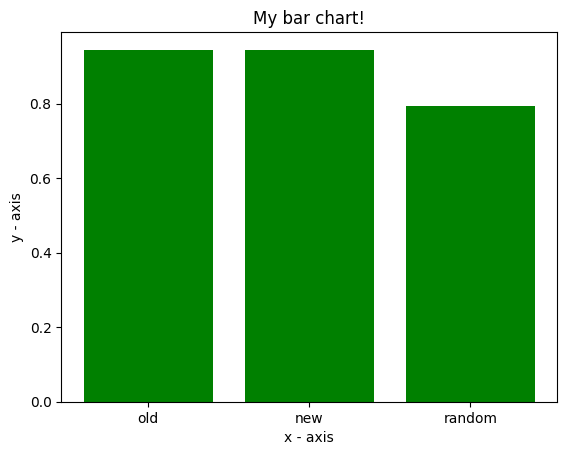

In [86]:
import matplotlib.pyplot as plt
  
# x-coordinates of left sides of bars 
left = [1, 2, 3]
  
# heights of bars
height = []
height.append(ac2[0])
height.append(ac2[1])
height.append(ac3[0])
  
# labels for bars
tick_label = ['old', 'new', 'random']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['green'])
  
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('My bar chart!')
  
# function to show the plot
plt.show()

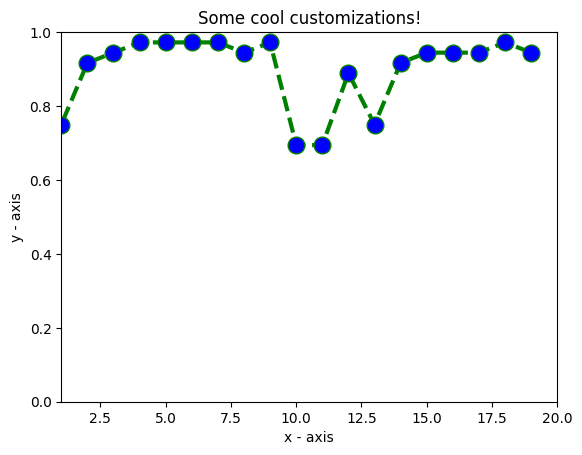

In [83]:
import matplotlib.pyplot as plt

# x axis values
x = range(20)
# corresponding y axis values
y = ac1

# plotting the points
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
		marker='o', markerfacecolor='blue', markersize=12)

# setting x and y axis range
plt.ylim(0,1)
plt.xlim(1,20)

# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')

# giving a title to my graph
plt.title('Some cool customizations!')

# function to show the plot
plt.show()


[0.6666666666666666, 0.75, 0.9166666666666666, 0.9444444444444444, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 0.9444444444444444, 0.9722222222222222, 0.6944444444444444, 0.6944444444444444, 0.8888888888888888, 0.75, 0.9166666666666666, 0.9444444444444444, 0.9444444444444444, 0.9444444444444444, 0.9722222222222222, 0.9444444444444444]


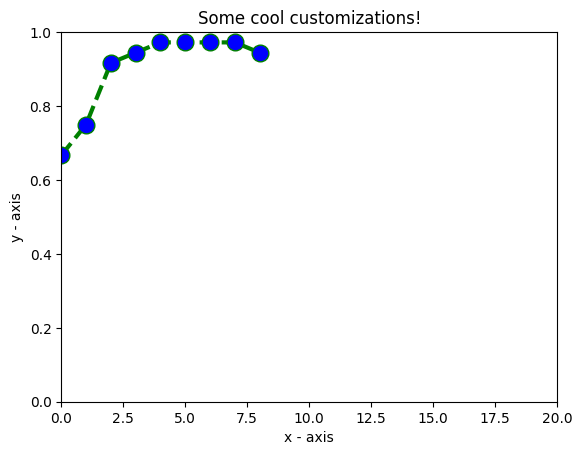

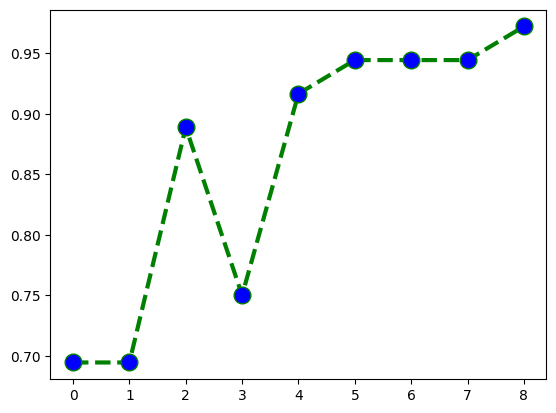

In [78]:
import matplotlib.pyplot as plt

# x axis values
x = range(9)
# corresponding y axis values
print(ac1)
y = ac1[0:9]
y2 = ac1[10:-1]

# plotting the points
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
		marker='o', markerfacecolor='blue', markersize=12)

# setting x and y axis range
plt.ylim(0,1)
plt.xlim(0,20)

# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')

# giving a title to my graph
plt.title('Some cool customizations!')

# function to show the plot
plt.show()

plt.plot(x, y2, color='green', linestyle='dashed', linewidth = 3,
		marker='o', markerfacecolor='blue', markersize=12)
plt.show()
